# Hello, pytorch

![img](https://s1.postimg.org/6fl45xnvnj/pytorch-logo-dark.png)

Hello, github dweller!

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/). For high-level interface see the next notebook.

__Pytorch feels__ differently than tensorflow/theano in almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

And now we finally shut up and let pytorch do the talking.

In [1]:
from __future__ import print_function
import numpy as np
import torch
print(torch.__version__)

0.2.0_4


In [6]:
# numpy world

x = np.arange(16).reshape(4,4)

print ("X :\n%s"%x)
print ("add 5 :\n%s"%(x + 5))
print ("X*X^T  :\n",np.dot(x,x.T))
print ("mean over cols :\n%s"%(x.mean(axis=-1)))
print ("cumsum of cols :\n%s"%(np.cumsum(x,axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[  1.5   5.5   9.5  13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [7]:
# pytorch world

x = np.arange(16).reshape(4,4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print ("X :\n%s"%x)
print ("add 5 :\n%s"%(x+5))
print ("X*X^T  :\n",torch.matmul(x,x.transpose(1,0)))
print ("mean over cols :\n",torch.mean(x,dim=-1))
print ("cumsum of cols :\n",torch.cumsum(x,dim=0))

X :

  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

add 5 :
 
  5   6   7   8
  9  10  11  12
 13  14  15  16
 17  18  19  20
[torch.FloatTensor of size 4x4]

X*X^T  :
 
  14   38   62   86
  38  126  214  302
  62  214  366  518
  86  302  518  734
[torch.FloatTensor of size 4x4]

mean over cols :
 
  1.5000
  5.5000
  9.5000
 13.5000
[torch.FloatTensor of size 4]

cumsum of cols :
 
  0   1   2   3
  4   6   8  10
 12  15  18  21
 24  28  32  36
[torch.FloatTensor of size 4x4]



## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. No graph declaration, no placeholders, no sessions. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Cheers!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ an __free gradients__. Besides you can always jump back to numpy with x.numpy()

In [ ]:
x = torch.linspace(0,2*np.pi,16)

#Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = <your code here>

print(out.numpy())

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Tensor vs Variable
![img](https://s1.postimg.org/1i8tinij33/torch_tensor_variable.png)

`    ` Tensor and Variable Weasley were identical and mischievous twin classes living in pytorch. Brilliant pranksters, they make sure your code never runs successfully from the first attempt.

`    ` Seriously though, pytorch suddenly has 2 main abstractions:
* Tensor, that we've just used
* Variable, which extends tensor and allows for automatic gradients

Ideally, you could wrap everything into Variable from the get-go an forget about Tensor. Hopefully you will once be able to do so [upvote [this](https://github.com/pytorch/pytorch/issues/2228)]. Right now you can't.


Some operations only work on tensors (e.g. bitwise &|~), some functions require variables (torch.nn.functional.whatever).

The good news is that you can always swap between the two seamlessly
* tensor to variable: `Variable(x)`
* variable to tensor: `x.data`


In [ ]:
from torch.autograd import Variable

x = torch.arange(0,16).view(4,4).type(torch.IntTensor)
x_var = Variable(x)

print ("Logical or (tensors):\n",(x==1) | (x%3==0))

#will not work
try:
    print ("Logical or (variables):")
    print ((x_var==1) | (x_var%3==0))
except Exception,e:
    print (e)
#instead: (x_var.data==1) | (x_var.data%3==0)


In [ ]:
#works:
sequence = torch.randn(1,8,10)
filters = torch.randn(2,8,3)

#will work:
print("conv1d (variables):\n",torch.nn.functional.conv1d(Variable(sequence),Variable(filters)))

#will not work:
try:
    print("conv1d (tensors):")
    print(torch.nn.functional.conv1d(sequence,filters))
except Exception,e:
    print (e)



## Task I: the game of life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure pytorch_. 

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU! __ Indeed, what could be a better use of your gpu than simulating game of life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the url above out of sloth, here's the game of life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference numpy implementation that you must convert to pytorch.
_[numpy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format. 

It's also convenient to `import torch.nn.functional as F`. 


In [ ]:
import numpy as np
from scipy.signal import convolve2d
def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]])
    
    N = convolve2d(Z,filters,mode='same')
    
    # Apply rules
    birth = (N==3) & (Z==0)
    survive = ((N==2) | (N==3)) & (Z==1)
    
    Z[:] = birth | survive
    return Z

In [ ]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    
    #<Your code here!>
    
    return Z


In [ ]:

#initial frame
Z_numpy = np.random.choice([0,1],p=(0.5,0.5),size=(100,100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

#your debug polygon :)
Z_new = torch_update(Z.copy())

#tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), "your pytorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion()

#initialize game field
Z = np.random.choice([0,1],size=(100,100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    
    #update
    Z = torch_update(Z)
    
    #re-draw image
    ax.clear()
    ax.imshow(Z.numpy(),cmap='gray')
    fig.canvas.draw()


In [ ]:
#Some fun setups with GoL for your amusement

#parallel stripes
Z = np.arange(100)%2 + np.zeros([100,100])
#with a small imperfection
Z[48:52,50]=1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(),cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

## Automatic gradients

Like most deep learning frameworks, pytorch can be persuaded to compute derivatives for you.

The general pipeline looks like this:
* You create ```a = Variable(...,requires_grad=True)```
* You define some differentiable `loss = whatever(a)`
* `loss.backward()`
* Gradients are available as ```a.grads```

Unlike theano or tensorflow, the loss function is defined dynamically on each minibatch, letting you change loss function on each step.

Another difference is that gradients are always stored in `.grad` of a variable. If you compute gradient from multiple losses, this will cause gradients to add up at variables, therefore it's useful to __zero the gradients__ between computations.


__Here's an example:__ fitting a linear regression the hard way

In [ ]:
from sklearn.datasets import load_boston
x,y = load_boston(return_X_y=True)

#select one column for simplicity. 
x = x[:,-1] / x[:,-1].std()
y = y / y.std()

%matplotlib inline
plt.scatter(x,y)

In [ ]:
# model variables
w = Variable(torch.zeros(1),requires_grad=True)
b = Variable(torch.zeros(1),requires_grad=True)

# data variables
x = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
y = Variable(torch.from_numpy(y)).type(torch.FloatTensor)

In [ ]:
#try out gradients
y_pred = w * x  + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a Variable containing gradient of L w.r.t. w

print("dL/dw = \n",w.grad)
print("dL/db = \n",b.grad)

Now let's use it to __perform gradient descent__.

This is as low-level a code as it can get for pytorch offers many pre-implemented learning methods. We'll delve into those methods in the next section.

In [ ]:
from IPython.display import clear_output

for i in range(100):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    #gradient descent
    loss.backward()

    w.data -= 0.1*w.grad.data
    b.data -= 0.1*b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    #the rest of code is just bells and whistles
    if (i+1)%5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.data.numpy()[0])
        if loss.data.numpy()[0] < 0.5:
            print("Done!")
            break
    



### Same, but simpler with `torch.optim`

To avoid keeping track of every single variable, you could instead use a pre-defined optimizer from torch.optim

In [ ]:
# get data
x,y = load_boston(return_X_y=True)
x = x[:,-1] / x[:,-1].std()
y = y / y.std()

# data variables
x = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
y = Variable(torch.from_numpy(y)).type(torch.FloatTensor)

# model variables
w = Variable(torch.zeros(1),requires_grad=True)
b = Variable(torch.zeros(1),requires_grad=True)

# define optimizer
opt = torch.optim.RMSprop([w,b],lr=0.1)

for i in range(100):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    #gradient descent
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    #the rest of code is just bells and whistles
    if (i+1)%5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.data.numpy()[0])
        if loss.data.numpy()[0] < 0.5:
            print("Done!")
            break

### Task II: A vs B problem

Once you've learned how to perform the gradient descent with PyTorch, it's time to put this knowledge to some use. We'll write logistic regression to classify letters.

We want you to write your very own logistic regression to classify NotMnist characters. For this simplified task, we'll only consider two classes: __"A"__ vs __"B"__.

In [ ]:
#notmnist small
!curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz
!tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log

In [3]:
import os
import numpy as np
from scipy.misc import imread,imresize
from glob import glob
def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',img_shape = (28,28)):
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split('/')[-2]
        if class_i not in letters: continue
        try:
            data.append(imresize(imread(img_path),img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]"%img_path)
        
    data = np.stack(data)[:,None]
    data = data.astype(np.float32)
    data = (data - np.mean(data))/np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    return data,labels

data,labels = load_notmnist(letters='AB')

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]


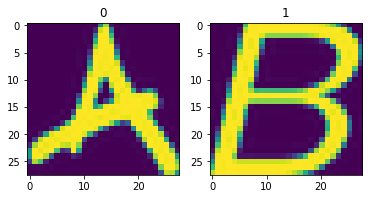

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(1,2,1)
plt.imshow(data[0].reshape([28,28]))
plt.title(str(labels[0]))
plt.subplot(1,2,2)
plt.imshow(data[-1].reshape([28,28]))
plt.title(str(labels[-1]))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.1)

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Train size = 3370, test_size = 375


This is a binary classification problem, so please train a __Logistic Regression with sigmoid__, not softmax.

You should use binary crossentropy (aka logloss) as your objective:
$$ L = - {1 \over N} \underset{X_i,y_i} \sum y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i))$$

Where probabilities are outputs of a logistic regression model:

$$P(y_i | X_i) = \sigma(\vec w \cdot X_i + b) ={ 1 \over {1+e^{- [\vec w \cdot X_i + b]}} }$$

$$[\vec w \cdot X_i \space denotes \space dot \space product]$$

Your model therefore has two trainable variables:
* $\vec w$ - a vector with as many elements as there are features (pixels)
* $b$ - a single number


In [7]:
# Create data variables
# YOUR CODE HERE!

# Create model variables
# YOUR CODE HERE!

# [optional] create optimizer from pytorch.optim


In [ ]:
for i in range(1000):
    
    # predict P(y_train|X_train)
    
    # compute loss
    
    # gradient descent
    
    # zero-out gradients
    
    # optional: plot learning curves

In [ ]:
from sklearn.metrics import accuracy_score

#predict P(y|x) for X_test as a numpy array
#hint: use .numpy() to get cast torch tensor into numpy array
predicted_probabilities = <YOUR CODE HERE>

accuracy = accuracy_score(y_test,predicted_probabilities)
print("Accuracy: %.5f"%)
if accuracy > 0.95:
    print("Well done! You've beaten the assignment.")

Debugging tips:
* initialize w and b either with zeros or with __small__ numbers. Sampling w ~ N(0,1) isn't small enough.
* make sure your model predicts probabilities correctly. Just print them and see what's inside.
* don't forget _minus_ sign in the loss function! It's a mistake 99% ppl do.
* In general, pytorch's error messages are quite helpful, read 'em before you google 'em.
* if you see nan/inf, print what happens at each iteration to find our where exactly it occurs.
* Don't forget to zero-out gradients after each step. Srsly:)

```

```

```

```

```

```

```

```

```

```
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>

### Going deeper
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure torch.

This time you will solve the same digit recognition problem, but at a greater scale
* 10 different letters
* 20k samples

With 10 classes you will need to use softmax instead of sigmoid and a multiclass version log loss (see [here](https://www.kaggle.com/wiki/LogLoss)). You can also expect your logistic regression to be less accurate.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already give you an edge over logistic regression.

__[bonus score]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILER!__
At the end of the notebook you will find a few tips and frequently made mistakes. If you feel enough might to shoot yourself in the foot without external assistance, we encourage you to do so, but if you encounter any unsurpassable issues, please do look there before mailing us.



In [10]:
data,labels = load_notmnist(letters='ABCDEFGHIJ')

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]


In [ ]:
#< a whole lot of your code > 

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from previous assignment to classify some number against others (e.g. zero vs nonzero)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as T.nnet.softmax (stable)
  - probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - you can also try momentum/rmsprop/adawhatever
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - __Do not initialize weights with zeros__ (due to symmetry effects). A gaussian noize with small variance will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.
  

### Coming next

So far we have only used the low level interface of PyTorch. In the next notebook, we'll cover how to train models more conveniently with high level PyTorch API: namely, the __torch.nn__.

## More links:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)